In [1]:
import sys

sys.path.append('./')

from main import main


Running optimize for all agents

Iteration Frank-Wolfe :  0 (agents:  _all )
Running HiGHS 1.5.3 [date: 2023-05-16, git hash: 594fa5a9d-dirty]
Copyright (c) 2023 HiGHS under MIT licence terms
Presolving model
46 rows, 93 cols, 138 nonzeros
46 rows, 93 cols, 138 nonzeros
Objective function is integral with scale 1250

Solving MIP model with:
   46 rows
   93 cols (47 binary, 0 integer, 0 implied int., 46 continuous)
   138 nonzeros

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
     Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   InLp Confl. | LpIters     Time

         0       0         0   0.00%   0               inf                  inf        0      0      0         0     0.0s
         0       0         0   0.00%   2.938260312     inf                  inf        0      0      2        83     0.0s
 R       0       0         0   0.00%   3.186019637     3.2536             

/Data/augustin.kheng/MAP511/OptimisationConsomationEDF/aggregator/optim.py:242: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, max(upper_bound_list))


Running HiGHS 1.5.3 [date: 2023-05-16, git hash: 594fa5a9d-dirty]
Copyright (c) 2023 HiGHS under MIT licence terms
Presolving model
46 rows, 93 cols, 138 nonzeros
46 rows, 93 cols, 138 nonzeros

Solving MIP model with:
   46 rows
   93 cols (47 binary, 0 integer, 0 implied int., 46 continuous)
   138 nonzeros

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
     Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   InLp Confl. | LpIters     Time

         0       0         0   0.00%   -63837.9872     inf                  inf        0      0      0         0     0.0s
         0       0         0   0.00%   -43355.435899   inf                  inf        0      0      2        70     0.0s
 L       0       0         0   0.00%   -31996.749768   -31996.7464        0.00%      879    103     43       208     0.0s

Solving report
  Status            Optimal
  Primal bound      -31996.7464
 

KeyboardInterrupt: 

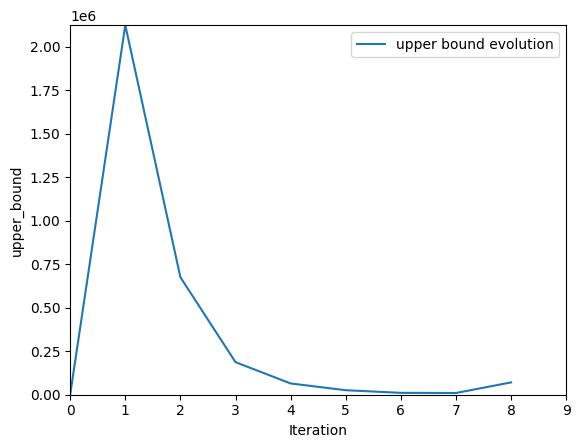

In [2]:
main()